In [41]:
# this is a code for testing the RL based Feature Selection method
from src.data.twomoon import Twomoon_synthetic
from src.model.rl import FeatureSelection
from src.model.new_try import FeatureSelection_Backward
import argparse
from src.data.datawrapper import DataWrapper
import numpy as np
from sklearn.model_selection import train_test_split
parser = argparse.ArgumentParser(description='RL based Feature Selection')
#parser.add_argument('--seed', type=int, default=12345, help='random seed')

parser.add_argument('--episode_number', type=int, default=10000, help='number of episodes')
parser.add_argument('--alpha', type=float, default=0.1, help='learning rate')
parser.add_argument('--gamma', type=float, default=0.3, help='discount factor')
parser.add_argument('--epsilon', type=float, default=0.1, help='epsilon greedy')
parser.add_argument('--predefined_reward', type=bool, default=False, help='predefined reward')
parser.add_argument('--correlation_loss_coefficient', type=float, default=0.01, help='correlation loss coefficient')
parser.add_argument('--datatype', type=str, default="spambase", help='arcene twomoon, spambase available')
parser.add_argument('--worsening_count', type=int, default=5, help='worsening count')   
args = parser.parse_args("")
X,Y=DataWrapper(args).get_data()

In [42]:
# SVC
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


svc=SVC(kernel='rbf',C=5)

### original

In [43]:
import json
# read json file
with open('results/spambase_predef_False_alpha_0.1_gamma_0.3_eps_0.1_cor_0.01.json') as json_file:
    data = json.load(json_file)


data['feature order']
top_1=data['feature order'][:1]
top_5=data['feature order'][:5]
top_10=data['feature order'][:10]
top_15=data['feature order'][:15]
top_20=data['feature order'][:20]
top_30=data['feature order'][:30]
top_50=data['feature order'][:50]

original_acc=[]

for i in [top_1,top_5,top_10,top_15,top_20,top_30]:
    X_new=X[:,i]
    # 5fold cross validation
    acc=[]
    for j in range(50):
        X_train, X_test, y_train, y_test = train_test_split(X_new, Y, test_size=0.3, random_state=j)
        svc.fit(X_train,y_train)
        y_pred=svc.predict(X_test)
        acc.append(accuracy_score(y_test,y_pred))
    print(np.mean(acc))
    original_acc.append(np.mean(acc))


0.7592034757422159
0.8710934105720493
0.8977262853005068
0.9078204199855177
0.9180304127443881
0.9258363504706736


### original + correlation coef

In [44]:
import json
# read json file
with open('results/spambase_predef_True_alpha_0.1_gamma_0.3_eps_0.1_cor_0.01.json') as json_file:
    data = json.load(json_file)


data['feature order']
top_1=data['feature order'][:1]
top_5=data['feature order'][:5]
top_10=data['feature order'][:10]
top_15=data['feature order'][:15]
top_20=data['feature order'][:20]
top_30=data['feature order'][:30]
top_50=data['feature order'][:50]

custom_acc=[]

for i in [top_1,top_5,top_10,top_15,top_20,top_30]:
    X_new=X[:,i]
    # 5fold cross validation
    acc=[]
    for j in range(50):
        X_train, X_test, y_train, y_test = train_test_split(X_new, Y, test_size=0.3, random_state=j)
        svc.fit(X_train,y_train)
        y_pred=svc.predict(X_test)
        acc.append(accuracy_score(y_test,y_pred))
    print(np.mean(acc))
    custom_acc.append(np.mean(acc))

0.7878493845039826
0.8870528602461983
0.9025923244026068
0.9126719768283853
0.9179435191889934
0.9289790007241132


### Backward

In [45]:
#train_test_split
from sklearn.model_selection import train_test_split
import json
# read json file
with open('results/spambase_alpha_0.1_gamma_0.3_eps_0.3_backward_True_tau_0.001_cor_0.001_custom_False.json') as json_file:
    data = json.load(json_file)

# BAckward

data_back=data['feature_order']
top_1=data_back[:1]
top_5=data_back[:5]
top_10=data_back[:10]
top_15=data_back[:15]
top_20=data_back[:20]
top_30=data_back[:30]
#top_50=data_back[:50]

backward_acc=[]

for i in [top_1,top_5,top_10,top_15,top_20,top_30]:
    # 5fold cross validation
    acc=[]
    for j in range(50):
        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=j)
        X_train=X_train[:,i]
        svc.fit(X_train,y_train)
        X_test=X_test[:,i]
        y_pred=svc.predict(X_test)
        acc.append(accuracy_score(y_test,y_pred))
    print(np.mean(acc))
    backward_acc.append(np.mean(acc))

0.7285155684286749
0.7605648081100652
0.7695582910934106
0.7732223026792181
0.7755104996379434
0.7798841419261404


### Backwar + corr coef

In [46]:
#train_test_split
from sklearn.model_selection import train_test_split
import json
# read json file
with open('results/spambase_alpha_0.1_gamma_0.3_eps_0.3_backward_True_tau_0.001_cor_0.001_custom_True.json') as json_file:
    data = json.load(json_file)

# BAckward

data_back_corr=data['feature_order']
top_1=data_back_corr[:1]
top_5=data_back_corr[:5]
top_10=data_back_corr[:10]
top_15=data_back_corr[:15]
top_20=data_back_corr[:20]
top_30=data_back_corr[:30]
#top_50=data_back[:50]

backward_cor_acc=[]

for i in [top_1,top_5,top_10,top_15,top_20,top_30]:
    # 5fold cross validation
    acc=[]
    for j in range(50):
        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=j)
        X_train=X_train[:,i]
        svc.fit(X_train,y_train)
        X_test=X_test[:,i]
        y_pred=svc.predict(X_test)
        acc.append(accuracy_score(y_test,y_pred))
    print(np.mean(acc))
    backward_cor_acc.append(np.mean(acc))

0.7285155684286749
0.7605792903692976
0.7706444605358435
0.7750615496017378
0.7790731354091238
0.7829109341057204


## Baseline

In [47]:
# random selection
import random
random_acc=[]

for i in [1,5,10,15,20,30]:
    # 5fold cross validation
    acc=[]
    for j in range(50):
        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=j)
        idxs=random.sample(range(0, 57), i)
        X_train=X_train[:,idxs]
        svc.fit(X_train,y_train)
        X_test=X_test[:,idxs]
        y_pred=svc.predict(X_test)
        acc.append(accuracy_score(y_test,y_pred))
    print(np.mean(acc))
    random_acc.append(np.mean(acc))

0.6036640115858074
0.5875887038377987
0.5965821868211441
0.5847936278059378
0.5982766111513396
0.6299782766111514


## SEFS

In [48]:
a=[1,6,3]
np.argsort(a)[::-1]

array([1, 2, 0])

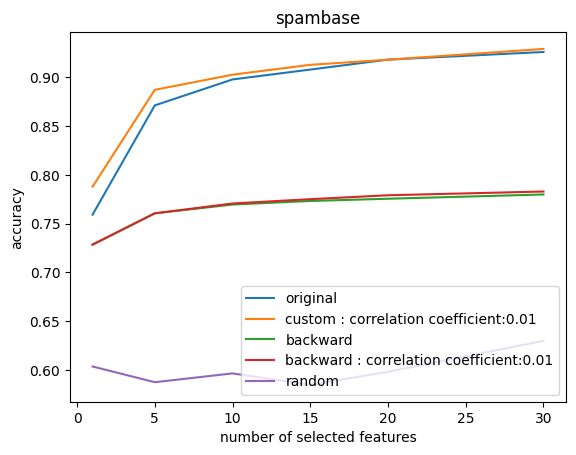

In [49]:
from matplotlib import pyplot as plt
plt.plot([1,5,10,15,20,30],original_acc[:],label='original')
plt.plot([1,5,10,15,20,30],custom_acc[:],label='custom : correlation coefficient:0.01')
plt.plot([1,5,10,15,20,30],backward_acc,label='backward')
plt.plot([1,5,10,15,20,30],backward_cor_acc,label='backward : correlation coefficient:0.01')
#plt.plot([1,5,10,15,20,30],sefs_acc,label='sefs')
plt.plot([1,5,10,15,20,30],random_acc,label='random')
plt.xlabel('number of selected features')
plt.ylabel('accuracy')
plt.title('spambase')
plt.legend()
